## 1: Importing the essential libraries



In [1]:
print(" Importing the essential libraries")

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
import matplotlib.pyplot as plt

print("Step 1: Successfully Completed")


 Importing the essential libraries
Step 1: Successfully Completed



## 2: The CIFAR-10 dataset is being loaded:



The CIFAR-10 dataset is being loaded:
Visualizing 10 random images from each class in the training dataset:


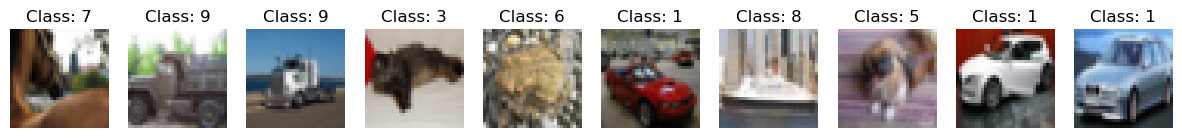

Visualizing 10 random images from each class in the test dataset:


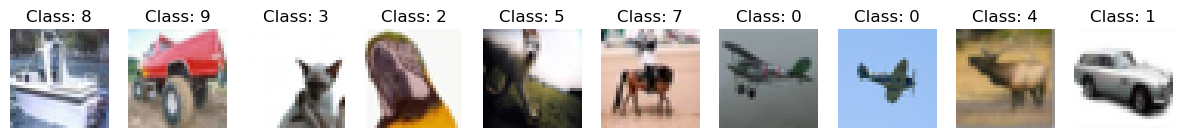

Step 2: Successfully Completed


In [2]:
print("The CIFAR-10 dataset is being loaded:")

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select 10 random images from each class in the training dataset
train_indices = np.random.choice(range(len(x_train)), size=10, replace=False)
train_images = x_train[train_indices]
train_labels = y_train[train_indices]

# Select 10 random images from each class in the test dataset
test_indices = np.random.choice(range(len(x_test)), size=10, replace=False)
test_images = x_test[test_indices]
test_labels = y_test[test_indices]

# Visualize the training and test images
print("Visualizing 10 random images from each class in the training dataset:")
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Class: {train_labels[i][0]}")
    plt.axis("off")
plt.show()

print("Visualizing 10 random images from each class in the test dataset:")
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Class: {test_labels[i][0]}")
    plt.axis("off")
plt.show()
print("Step 2: Successfully Completed")



## 3: Pixel value normalization:




In [3]:
print("Pixel value normalization:")

# Normalize the pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Step 3: Successfully Completed")


Pixel value normalization:
Step 3: Successfully Completed



## 4: Creating the CNN model:



In [4]:
print("Creating the CNN model")

# Build the CNN model for preprocessed data
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

# Build the CNN model without preprocessing
model_no_preprocessing = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_no_preprocessing.summary()

print("Step 4: Successfully Completed")


Creating the CNN model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (Non


## 5: Defining a function for compiling and training the model using various optimizers and regularizers:




In [5]:
print("Defining a function for compiling and training the model using various optimizers and regularizers")

# Function to compile and train the model with different optimizers and regularizers
def train_model(optimizer, reg=None):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, shuffle=True, callbacks=[early_stopping])
    return history

model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


print("Step 5: Successfully Completed")


Defining a function for compiling and training the model using various optimizers and regularizers
Step 5: Successfully Completed



## 6: Making the callback for early_stopping:


In [6]:
print("Making the callback for early_stopping")

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


print("Step 6: Successfully Completed")

Making the callback for early_stopping
Step 6: Successfully Completed



## 7: Three distinct optimizers (SGD, ADAM, and RMSPROP) were used:


In [7]:
print("Applying three different optimizers (SGD, ADAM, RMSPROP)")

# Try applying three different optimizers (SGD, ADAM, RMSPROP)
# SGD with different momentums
momentums = [0.0, 0.5, 0.9]
sgd_histories = []

for momentum in momentums:
    print(f"Training SGD optimizer with momentum={momentum}...")
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=momentum)
    sgd_history = train_model(sgd_optimizer)
    sgd_histories.append(sgd_history)
    print(f"Training with SGD optimizer with momentum={momentum} completed successfully.")

print("Training ADAM optimizer...")
# ADAM optimizer
adam_history = train_model(tf.keras.optimizers.Adam(learning_rate=0.001))
print("Training with ADAM optimizer completed successfully.")

print("Training RMSprop optimizer...")
# RMSprop optimizer
rmsprop_history = train_model(tf.keras.optimizers.RMSprop(learning_rate=0.001))
print("Training with RMSprop optimizer completed successfully.")

print("Step 7: Successfully Completed")

Applying three different optimizers (SGD, ADAM, RMSPROP)
Training SGD optimizer with momentum=0.0...
Epoch 1/20
625/625 [==============================] - 35s 56ms/step - loss: 2.3018 - accuracy: 0.1086 - val_loss: 2.2971 - val_accuracy: 0.1496
Epoch 2/20
625/625 [==============================] - 34s 55ms/step - loss: 2.2971 - accuracy: 0.1208 - val_loss: 2.2937 - val_accuracy: 0.1662
Epoch 3/20
625/625 [==============================] - 34s 55ms/step - loss: 2.2929 - accuracy: 0.1337 - val_loss: 2.2898 - val_accuracy: 0.1770
Epoch 4/20
625/625 [==============================] - 35s 56ms/step - loss: 2.2896 - accuracy: 0.1432 - val_loss: 2.2846 - val_accuracy: 0.1800
Epoch 5/20
625/625 [==============================] - 34s 55ms/step - loss: 2.2830 - accuracy: 0.1560 - val_loss: 2.2775 - val_accuracy: 0.1966
Epoch 6/20
625/625 [==============================] - 35s 55ms/step - loss: 2.2762 - accuracy: 0.1623 - val_loss: 2.2680 - val_accuracy: 0.2247
Epoch 7/20
625/625 [===============

Epoch 4/20
625/625 [==============================] - 33s 52ms/step - loss: 0.8908 - accuracy: 0.6870 - val_loss: 0.9139 - val_accuracy: 0.6776
Epoch 5/20
625/625 [==============================] - 34s 54ms/step - loss: 0.8092 - accuracy: 0.7164 - val_loss: 0.8799 - val_accuracy: 0.6960
Epoch 6/20
625/625 [==============================] - 34s 54ms/step - loss: 0.7383 - accuracy: 0.7401 - val_loss: 0.8404 - val_accuracy: 0.7130
Epoch 7/20
625/625 [==============================] - 33s 53ms/step - loss: 0.6832 - accuracy: 0.7594 - val_loss: 0.8323 - val_accuracy: 0.7194
Epoch 8/20
625/625 [==============================] - 33s 53ms/step - loss: 0.6285 - accuracy: 0.7780 - val_loss: 0.8434 - val_accuracy: 0.7259
Epoch 9/20
625/625 [==============================] - 33s 53ms/step - loss: 0.5838 - accuracy: 0.7940 - val_loss: 0.8378 - val_accuracy: 0.7242
Epoch 10/20
625/625 [==============================] - 33s 53ms/step - loss: 0.5376 - accuracy: 0.8083 - val_loss: 0.8439 - val_accuracy


## 8: Impact of applying regularizers (L1/L2) in the Conv2D layer is shown:




In [8]:
import tensorflow as tf

print("Impact of applying regularizers (L1/L2) in the Conv2D layer is shown")

print("Training L1 regularization...")
# L1 regularization
l1_history = train_model(tf.keras.optimizers.Adam(learning_rate=0.001), reg=tf.keras.regularizers.l1(0.001))
print("Training with L1 regularization completed successfully.")

print("Training L2 regularization...")
# L2 regularization
l2_history = train_model(tf.keras.optimizers.Adam(learning_rate=0.001), reg=tf.keras.regularizers.l2(0.001))
print("Training with L2 regularization completed successfully.")

print("Step 8: Successfully Completed")


Impact of applying regularizers (L1/L2) in the Conv2D layer is shown
Training L1 regularization...
Epoch 1/20
625/625 [==============================] - 35s 56ms/step - loss: 0.5147 - accuracy: 0.8184 - val_loss: 0.8772 - val_accuracy: 0.7254
Epoch 2/20
625/625 [==============================] - 36s 58ms/step - loss: 0.4678 - accuracy: 0.8338 - val_loss: 0.8754 - val_accuracy: 0.7245
Epoch 3/20
625/625 [==============================] - 34s 54ms/step - loss: 0.4373 - accuracy: 0.8431 - val_loss: 0.8669 - val_accuracy: 0.7328
Epoch 4/20
625/625 [==============================] - 33s 53ms/step - loss: 0.4093 - accuracy: 0.8543 - val_loss: 0.9236 - val_accuracy: 0.7238
Epoch 5/20
625/625 [==============================] - 33s 53ms/step - loss: 0.3796 - accuracy: 0.8640 - val_loss: 0.9119 - val_accuracy: 0.7295
Epoch 6/20
625/625 [==============================] - 34s 54ms/step - loss: 0.3533 - accuracy: 0.8719 - val_loss: 0.9870 - val_accuracy: 0.7152
Training with L1 regularization compl


## 9: Train and test the model without preprocessing:




In [9]:
print("Train and test the model without preprocessing")

print("Training model with no preprocessing...")
# Train the model without preprocessing
history_no_preprocessing = model_no_preprocessing.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2, shuffle=True)
print("Training with no preprocessing completed successfully.")

# Evaluate the model on the test set without preprocessing
test_loss, test_accuracy = model_no_preprocessing.evaluate(x_test, y_test, batch_size=64)
print(f"Test Accuracy (No Preprocessing): {test_accuracy*100:.2f}%")
print(f"Test Loss (No Preprocessing): {test_loss:.4f}")

print("Step 9: Successfully Completed")


Train and test the model without preprocessing
Training model with no preprocessing...
Epoch 1/20
625/625 [==============================] - 36s 57ms/step - loss: 1.6793 - accuracy: 0.3767 - val_loss: 1.3879 - val_accuracy: 0.4977
Epoch 2/20
625/625 [==============================] - 33s 53ms/step - loss: 1.2977 - accuracy: 0.5339 - val_loss: 1.1621 - val_accuracy: 0.5923
Epoch 3/20
625/625 [==============================] - 33s 53ms/step - loss: 1.1377 - accuracy: 0.5958 - val_loss: 1.0327 - val_accuracy: 0.6404
Epoch 4/20
625/625 [==============================] - 33s 53ms/step - loss: 1.0370 - accuracy: 0.6356 - val_loss: 0.9832 - val_accuracy: 0.6514
Epoch 5/20
625/625 [==============================] - 33s 53ms/step - loss: 0.9409 - accuracy: 0.6693 - val_loss: 0.9265 - val_accuracy: 0.6778
Epoch 6/20
625/625 [==============================] - 33s 53ms/step - loss: 0.8775 - accuracy: 0.6920 - val_loss: 0.9125 - val_accuracy: 0.6850
Epoch 7/20
625/625 [=============================


## 10: Plotting accuracy over time for various experiments:


Plotting accuracy over time for various experiments


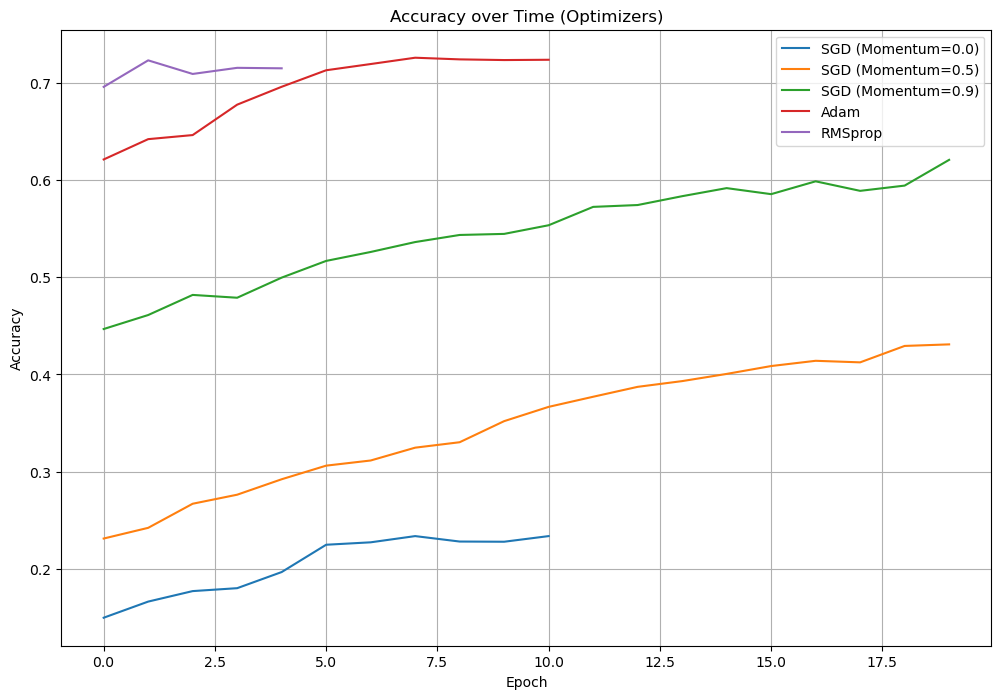

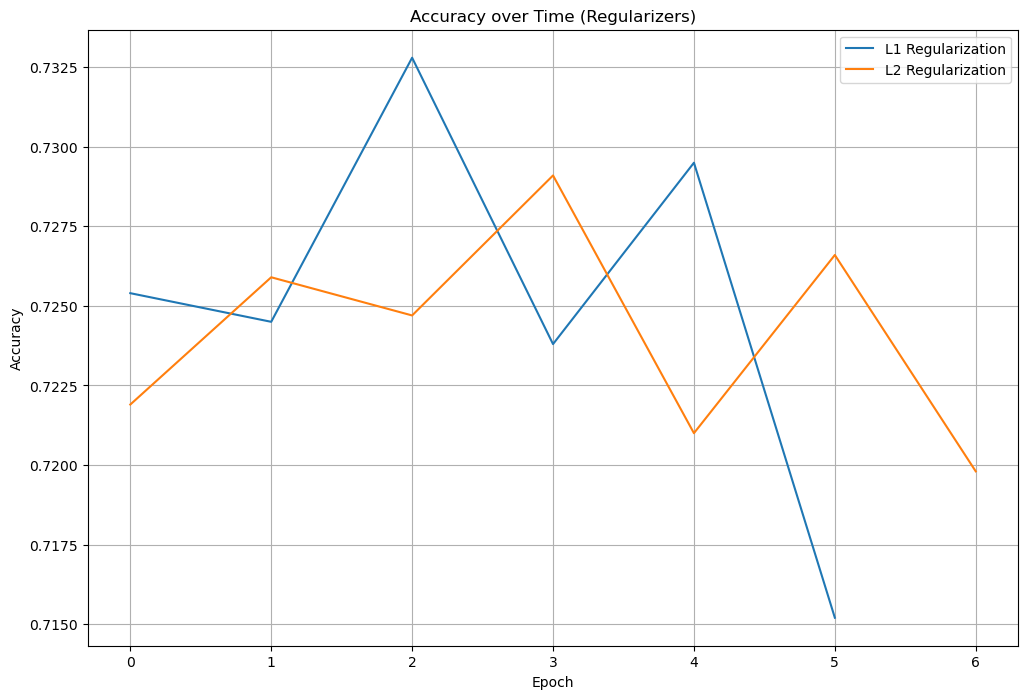

<Figure size 1200x800 with 0 Axes>

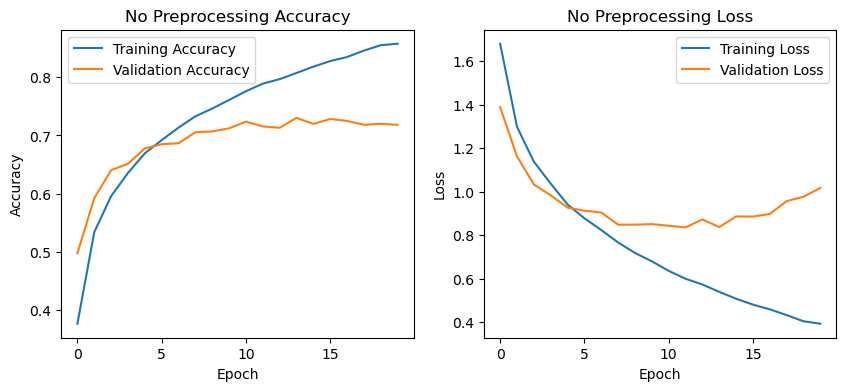

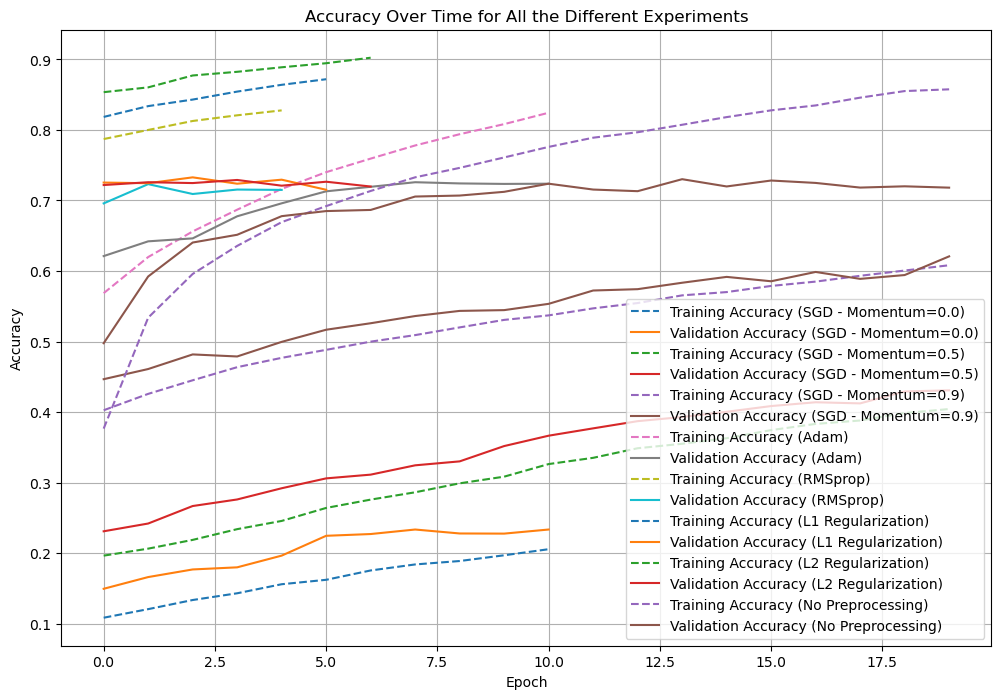

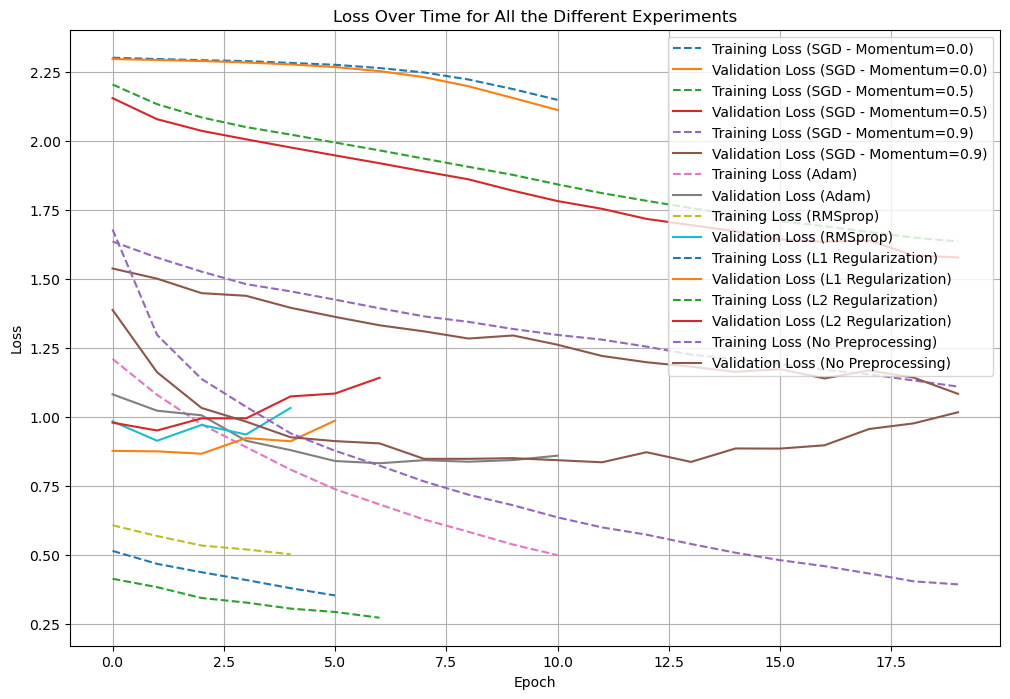

Step 10: Successfully Completed


In [10]:
print("Plotting accuracy over time for various experiments")

# Plot accuracy over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['val_accuracy'], label=f'SGD (Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['val_accuracy'], label='Adam')

# Plot RMSprop
plt.plot(rmsprop_history.history['val_accuracy'], label='RMSprop')

plt.title('Accuracy over Time (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
# Plot L1 regularization
plt.plot(l1_history.history['val_accuracy'], label='L1 Regularization')

# Plot L2 regularization
plt.plot(l2_history.history['val_accuracy'], label='L2 Regularization')
plt.title('Accuracy over Time (Regularizers)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
# Plot accuracy and loss over time of no preprocessing
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_preprocessing.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_preprocessing.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('No Preprocessing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_no_preprocessing.history['loss'], label='Training Loss')
plt.plot(history_no_preprocessing.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('No Preprocessing Loss')

plt.show()




# Plot accuracy over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['accuracy'], label=f'Training Accuracy (SGD - Momentum={momentum})', linestyle='dashed')
    plt.plot(sgd_histories[i].history['val_accuracy'], label=f'Validation Accuracy (SGD - Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['accuracy'], label='Training Accuracy (Adam)', linestyle='dashed')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy (Adam)')

# Plot RMSprop
plt.plot(rmsprop_history.history['accuracy'], label='Training Accuracy (RMSprop)', linestyle='dashed')
plt.plot(rmsprop_history.history['val_accuracy'], label='Validation Accuracy (RMSprop)')

# Plot L1 regularization
plt.plot(l1_history.history['accuracy'], label='Training Accuracy (L1 Regularization)', linestyle='dashed')
plt.plot(l1_history.history['val_accuracy'], label='Validation Accuracy (L1 Regularization)')

# Plot L2 regularization
plt.plot(l2_history.history['accuracy'], label='Training Accuracy (L2 Regularization)', linestyle='dashed')
plt.plot(l2_history.history['val_accuracy'], label='Validation Accuracy (L2 Regularization)')

# Plot no preprocessing
plt.plot(history_no_preprocessing.history['accuracy'], label='Training Accuracy (No Preprocessing)', linestyle='dashed')
plt.plot(history_no_preprocessing.history['val_accuracy'], label='Validation Accuracy (No Preprocessing)')

plt.title('Accuracy Over Time for All the Different Experiments')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Plot loss over time for different experiments
plt.figure(figsize=(12, 8))

# Plot SGD with different momentums
for i, momentum in enumerate(momentums):
    plt.plot(sgd_histories[i].history['loss'], label=f'Training Loss (SGD - Momentum={momentum})', linestyle='dashed')
    plt.plot(sgd_histories[i].history['val_loss'], label=f'Validation Loss (SGD - Momentum={momentum})')

# Plot ADAM
plt.plot(adam_history.history['loss'], label='Training Loss (Adam)', linestyle='dashed')
plt.plot(adam_history.history['val_loss'], label='Validation Loss (Adam)')

# Plot RMSprop
plt.plot(rmsprop_history.history['loss'], label='Training Loss (RMSprop)', linestyle='dashed')
plt.plot(rmsprop_history.history['val_loss'], label='Validation Loss (RMSprop)')

# Plot L1 regularization
plt.plot(l1_history.history['loss'], label='Training Loss (L1 Regularization)', linestyle='dashed')
plt.plot(l1_history.history['val_loss'], label='Validation Loss (L1 Regularization)')

# Plot L2 regularization
plt.plot(l2_history.history['loss'], label='Training Loss (L2 Regularization)', linestyle='dashed')
plt.plot(l2_history.history['val_loss'], label='Validation Loss (L2 Regularization)')

# Plot no preprocessing
plt.plot(history_no_preprocessing.history['loss'], label='Training Loss (No Preprocessing)', linestyle='dashed')
plt.plot(history_no_preprocessing.history['val_loss'], label='Validation Loss (No Preprocessing)')

plt.title('Loss Over Time for All the Different Experiments')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Step 10: Successfully Completed")
